In [6]:
import os
import shutil
from tqdm import tqdm
from pathlib import Path

In [7]:
FILTERED_TEST_SET_PATH = Path("../RT-DETR/dataset/test_hand_label")
os.makedirs(FILTERED_TEST_SET_PATH, exist_ok=True)
os.makedirs(FILTERED_TEST_SET_PATH, exist_ok=True)

SUSPECTS_PATH = Path("../RT-DETR/dataset/suspects_hand_label_unique")
GALLERY_PATH = Path("../RT-DETR/dataset/gallery_hand_label_filtered")

In [8]:
plushie_identities = os.listdir(GALLERY_PATH)
for identity in tqdm(plushie_identities):
    os.makedirs(FILTERED_TEST_SET_PATH / identity, exist_ok=True)
    # copy the suspect images to the unfiltered test set
    for suspect_img in os.listdir(SUSPECTS_PATH / identity):
        shutil.copy(SUSPECTS_PATH / identity / suspect_img, FILTERED_TEST_SET_PATH / identity / suspect_img)
    # copy the gallery images to the unfiltered test set
    for gallery_img in os.listdir(GALLERY_PATH / identity):
        shutil.copy(GALLERY_PATH / identity / gallery_img, FILTERED_TEST_SET_PATH / identity / gallery_img)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:00<00:00, 269.03it/s]


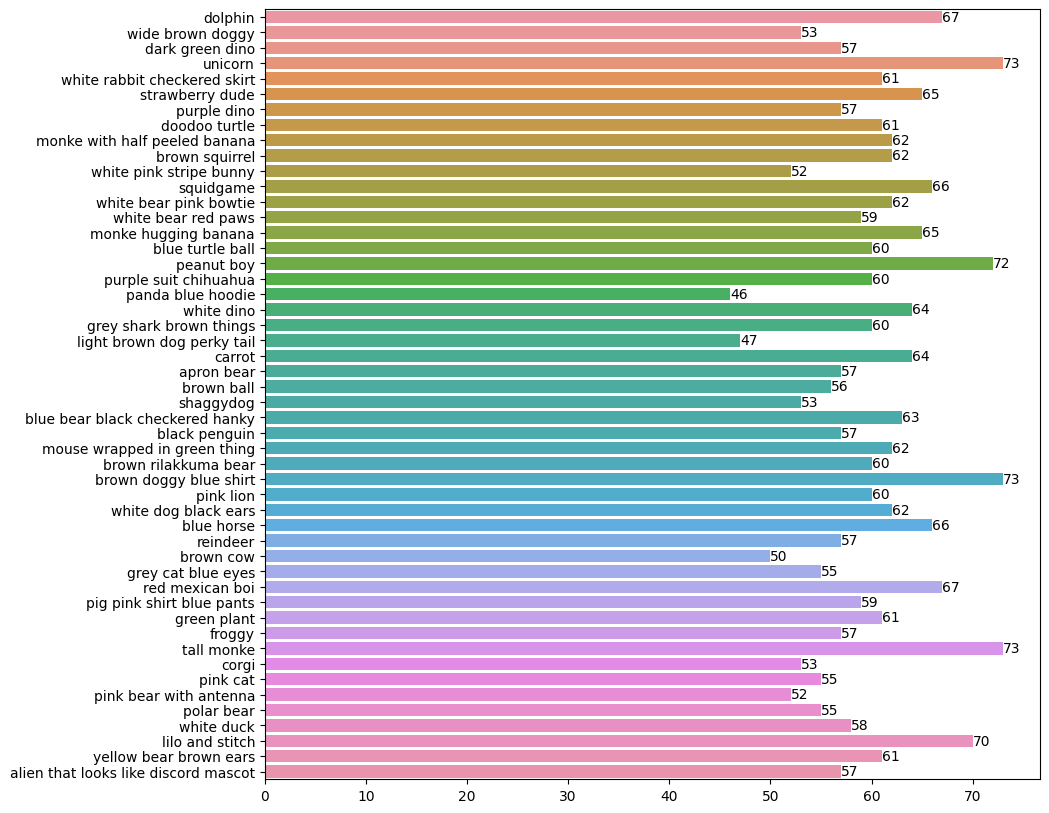

In [9]:
# get size of each plushie identity subfolder in the unfiltered test set
plushie_identities = os.listdir(FILTERED_TEST_SET_PATH)
plushie_identities_size = [len(os.listdir(FILTERED_TEST_SET_PATH / id)) for id in plushie_identities]
plushie_identities_size
# plot horizontal bar chart of plushie identity against size
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))
chart = sns.barplot(x=plushie_identities_size, y=plushie_identities)
for c in chart.containers:
    chart.bar_label(c)